In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

In this week's programming problem, you will use random codes to reliable communicate over a binary symmetric channel.

We will represent **bitstrings** efficiently by using NumPy arrays containing 0s and 1s. The following helper function converts Python strings into the corresponding NumPy arrays -- it is used in some of our tests.

In [2]:
def unpack(s):
    return np.array([int(b) for b in s])


assert np.all(unpack("1011") == [1, 0, 1, 1])

Here is another convenience function. It computes the entropy $H(\{p,1-p\})$ of a binary distribution:

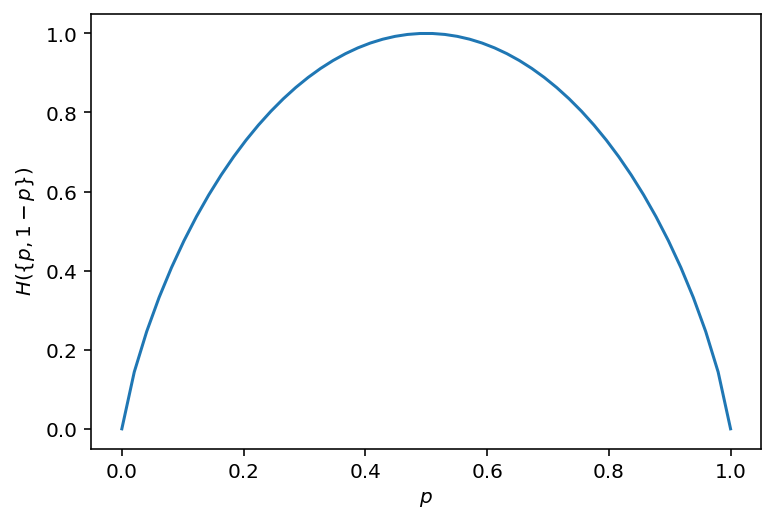

In [3]:
def binary_entropy(p):
    return -p * np.log2(p, where=p > 0) - (1 - p) * np.log2(1 - p, where=p < 1)


p = np.linspace(0, 1)
plt.plot(p, binary_entropy(p))
plt.xlabel("$p$")
plt.ylabel(r"$H(\{p,1-p\})$")
plt.show()

# Binary Symmetric Channel

In the first homework, you programmed the binary symmetric channel with bit flip parameter $f$. Here is one possible solution:

In [4]:
def binary_symmetric_channel(x, f):
    flip_mask = np.random.random(x.shape) < f
    return np.where(flip_mask, np.logical_not(x), x)

**Your first task today is to implement a function that computes the capacity of the binary symmetric function with bit flip probability $f$.** Do you remember the formula from class?

In [ ]:
def capacity(f):
    # TODO: can you implement this?
    return ...

Throughout this homework, we will be interested in the binary symmetric channel with bit flip probability $f=10%$. Its capacity is around 53%:

In [ ]:
FLIP_PROB = 0.1
assert np.round(capacity(FLIP_PROB), 2) == 0.53

# Random Codes

**Your next task is to write a function that generates a random $(N,K)$-code.** Your function should take as input $N$ and $K$, and it should return as output a list of $2^K$ codewords. To generate the codewords, use the *uniform* input distribution $\Pr(X=0)=\Pr(X=1)=1/2$, which for the binary symmetric channel has the property that the corresponding mutual information $I(X:Y)$ equals the capacity.

In [ ]:
def make_random_code(N, K):
    # TODO: can you implement this?
    return ...

Here is a simple test to make sure that your output format is correct:

In [ ]:
C = make_random_code(25, 10)
assert len(C) == 2 ** 10
assert all(len(x) == 25 for x in C)

The following function encodes a message $s$ using a code $C$. For convenience, we will take $s$ to be in $\{0,\dots,2^K-1\}$ (this is different than in class).

In [ ]:
def encode(C, s):
    return C[s]

# Typical Set Decoder

Next, we need a decoder. We will use the typical set decoder discussed in class, so we need functionality to test when bitstrings are in typical and jointly typical sets.

**First, program a function that takes as input a bitstring $x^N$, a probability $p \in [0,1]$, and a number $\varepsilon>0$, and which returns whether $x^N$ is in the typical set $T_{N,\varepsilon}(P)$ for a binary distribution with probabilities $P(1)=p$, $P(0)=1-p$.**

In [ ]:
def is_typical(x, p, eps):
    # TODO: can you implement this?
    return ...

Here is a test case to make sure that your function works correctly.

In [ ]:
x = "0000000010101000000000101000000001110000000000000100000000000000001000001000000000000010001101000010"
assert is_typical(unpack(x), p=0.2, eps=0.1)
assert not is_typical(unpack(x), p=0.2, eps=0.05)

What we are really interested in is the **jointly** typical set $J_{N,\varepsilon}$ associated with the joint distribution $P(x,y) = P(x) Q(y|x)$, where $P(x) \equiv 1/2$ is the uniform input distribution and $Q(y|x)$ the binary symmetric channel with bit flip probability $f$.

**Implement the following function that checks whether a pair of bitstrings $(x^N,y^N)$ is in the jointly typical $J_{N,\varepsilon}$. The function takes as input the two bitstrings $x^N$ and $y^N$, the bit flip probability $f$ of the binary symmetric channel, and $\varepsilon>0$.**

*Hint: You discussed in the exercise class!*

In [ ]:
def is_jointly_typical(x, y, f, eps):
    # TODO: can you implement this?
    return ...

Again, here is a test for you convenience.

In [ ]:
x = "0111111100100111101000001000101010000000000100101010011110111001011010100111001100100101101010110010"
y = "0011111000100110101000001000101010000000000100101000011110111001011011100111101100100101101010010010"
assert is_jointly_typical(unpack(x), unpack(y), f=FLIP_PROB, eps=0.2)
assert not is_jointly_typical(unpack(x), unpack(y), f=FLIP_PROB, eps=0.01)

Here is another test, which checks that if we draw a uniformly input string $x^N$ and let $y^N$ denote the random channel output then $(x^N,y^N)$ is jointly typical with high probability as $N\to\infty$:

In [ ]:
EPS = 0.2
NUM_TRIALS = 1000

Ns = np.arange(5, 250, 20)
ps = np.zeros_like(Ns, dtype=float)
for i, N in enumerate(Ns):
    for _ in range(NUM_TRIALS):
        # create uniformly random bitstring
        x = np.random.randint(2, size=N)

        # apply binary symmetric channel
        y = binary_symmetric_channel(x, FLIP_PROB)

        # record whether jointly typical
        ps[i] += is_jointly_typical(x, y, FLIP_PROB, EPS)
    ps[i] = ps[i] / NUM_TRIALS

plt.plot(Ns, ps, ".-")
plt.xlabel("$N$")
plt.ylabel(r"$\Pr((X^N,Y^N) \in J_{N,%s})$" % EPS)
plt.show()

**Finally, program a function that implements the typical set decoder.** Your function should take as input the channel output $y^N$, a list `C` which contains the codewords $x^N(s)$ for $s=0,1,\dots,2^K-1$ (one after the other), the bit flip probability $f$, and $\varepsilon>0$. If there exists a unique $s$ such that $x^N(s)$ and $y^N$ are jointly typical, it should return $s$. Otherwise, it should return `None` (signaling an error).

In [ ]:
def decode(y, C, f, eps):
    # TODO: can you implement this?
    return None

The following test create a random code of block size $N$ for communicating a single bit ($K=1$), i.e., it has rate $R=1/1000$. It then repeatedly encodes a random bit, applies the binary symmetric channel with 10% bit flip probability, and checks whether your decoder successfully decodes the `0` bit. At the end, it prints the average probability of (block) error. If your decoder works correctly, $p_B$ should be very close to zero.

In [ ]:
EPS = 0.1
C = make_random_code(1000, 1)

NUM_TRIALS = 1000
num_errors = 0
for _ in range(NUM_TRIALS):
    s = np.random.randint(2)
    x = encode(C, s)
    y = binary_symmetric_channel(x, FLIP_PROB)
    num_errors += decode(y, C, FLIP_PROB, eps=EPS) != s
p = num_errors / NUM_TRIALS
print(f"p_B = {p:3.0%} (should be very close to 0%)")

# Evaluating the Code and Decoder

Finally, it is time for a more systematic evaluation:
1. **For $K=8$ and $N\in\{10,20,40,100\}$, estimate the average probability of (block) error $p_B$ when using a random $(N,K)$-code, the binary symmetric channel with bit flip probability f=10%, and the typical set decoder with parameter $\varepsilon=0.1$.**
1. **Plot $p_B$ against rate $R=K/N$.**

In [ ]:
K = 8
EPS = 0.1
Ns = np.array([10, 20, 40, 100])
pBs = np.zeros_like(Ns, dtype=float)

# TODO: can you complete this?
...

Does this picture agree with your expectations? Can you think of a better way to illustrate the noisy coding theorem?